In [47]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [18]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")


In [19]:
display(train.shape)
display(test.shape)

(800, 22)

(200, 21)

In [23]:
pd.set_option('display.max_columns', None)
train.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,1,1,1,0,1,1,1,18.605397,f,White-European,no,no,United States,no,7.819715,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,1,13.829369,f,South Asian,no,no,Australia,no,10.544296,18 and more,?,0
2,3,1,1,1,1,1,1,0,0,1,1,14.679893,f,White-European,no,no,United Kingdom,no,13.167506,18 and more,Self,1
3,4,0,0,0,1,0,0,0,0,0,0,61.035288,f,South Asian,no,no,New Zealand,no,1.530098,18 and more,?,0
4,5,0,0,0,0,1,0,0,0,1,1,14.256686,m,Black,no,yes,Italy,no,7.949723,18 and more,Self,0


In [21]:
display(train.isna().sum())
display(test.isna().sum())

0

0

In [22]:
train.describe()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.0000,800.000000,800.00000,800.000000,800.00000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,400.5000,0.582500,0.28625,0.321250,0.41500,0.457500,0.20875,0.273750,0.717500,0.316250,0.460000,28.612306,7.058530,0.231250
std,231.0844,0.493455,0.45229,0.467249,0.49303,0.498502,0.40667,0.446161,0.450497,0.465303,0.498709,12.872373,3.788969,0.421896
min,1.0000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,9.560505,-2.594654,0.000000
25%,200.7500,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,19.282082,4.527556,0.000000
50%,400.5000,1.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,25.479960,6.893472,0.000000
75%,600.2500,1.000000,1.00000,1.000000,1.00000,1.000000,0.00000,1.000000,1.000000,1.000000,1.000000,33.154755,9.892981,0.000000
max,800.0000,1.000000,1.00000,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,72.402488,13.390868,1.000000


In [25]:
train = train.rename(columns = {'austim': 'autism', 'contry_of_res':'country_of_res'})
test = test.rename(columns = {'austim': 'autism', 'contry_of_res':'country_of_res'})

In [26]:
train.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,autism,country_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,1,1,1,0,1,1,1,18.605397,f,White-European,no,no,United States,no,7.819715,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,1,13.829369,f,South Asian,no,no,Australia,no,10.544296,18 and more,?,0
2,3,1,1,1,1,1,1,0,0,1,1,14.679893,f,White-European,no,no,United Kingdom,no,13.167506,18 and more,Self,1
3,4,0,0,0,1,0,0,0,0,0,0,61.035288,f,South Asian,no,no,New Zealand,no,1.530098,18 and more,?,0
4,5,0,0,0,0,1,0,0,0,1,1,14.256686,m,Black,no,yes,Italy,no,7.949723,18 and more,Self,0


In [56]:
train['age'].unique()

array([18.60539681, 13.82936938, 14.67989264, 61.03528807, 14.25668605,
       15.57819071, 21.36698098, 28.93006774, 20.30594341, 17.96459873,
       15.40690273, 22.87041047, 29.11206645, 45.7861637 , 28.71312905,
       36.08435983, 52.20892387, 13.97301145, 15.55955208, 13.99395149,
       24.34811834, 38.5945887 , 37.54394119, 15.77964696, 37.91975494,
       31.79042116, 54.51081856, 24.2640054 , 44.85675975, 13.71660497,
       23.01064721, 34.48599757, 24.62929977, 45.98472454, 23.8768401 ,
       54.53720884, 13.53526348, 25.55286793, 55.07023813, 44.8700017 ,
       14.24974298, 39.43876274, 37.11566426, 16.09705879, 65.6951177 ,
       17.9297571 , 38.0985636 , 31.26745092, 37.37522679, 27.47619568,
       24.04423243, 15.92003387, 14.39803871, 17.63356169, 22.14783581,
       41.71234687, 48.56647483, 51.80196369, 30.64667127, 33.05861987,
       20.53650583, 27.24063427, 26.30248764, 32.42403082, 52.02688326,
       44.09821754, 21.10272977, 17.51408417, 15.59883742, 19.53

In [59]:
train['age']=train['age'].apply(np.int64)

In [61]:
train['age'].unique()

array([18, 13, 14, 61, 15, 21, 28, 20, 17, 22, 29, 45, 36, 52, 24, 38, 37,
       31, 54, 44, 23, 34, 25, 55, 39, 16, 65, 27, 41, 48, 51, 30, 33, 26,
       32, 19,  9, 35, 11, 42, 12, 70, 46, 69, 47, 67, 62, 53, 71, 64, 59,
       58, 50, 49, 10, 72, 40, 60, 68, 43, 63, 57, 56, 66], dtype=int64)

In [38]:
train.ethnicity.unique()

array(['White-European', 'South Asian', 'Black', 'Asian',
       'Middle Eastern ', '?', 'Others', 'Latino', 'Turkish', 'Hispanic',
       'Pasifika'], dtype=object)

In [32]:
train.age_desc.unique()

array(['18 and more'], dtype=object)

In [31]:
# others to Others

train['ethnicity'][train['ethnicity'] == 'others'] = 'Others'
test['ethnicity'][test['ethnicity'] == 'others'] = 'Others'

C:\Users\tigna\AppData\Local\Temp\ipykernel_11340\1682596527.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['ethnicity'][train['ethnicity'] == 'others'] = 'Others'
C:\Users\tigna\AppData\Local\Temp\ipykernel_11340\1682596527.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['ethnicity'][test['ethnicity'] == 'others'] = 'Others'


In [33]:
train.drop(['ID', 'age_desc'], axis=1, inplace=True)
test.drop(['ID', 'age_desc'], axis=1, inplace=True)

In [35]:
train['ethnicity'].value_counts()

White-European     211
?                  151
Asian              134
Middle Eastern     116
Black               45
Latino              44
South Asian         35
Others              26
Pasifika            18
Hispanic            16
Turkish              4
Name: ethnicity, dtype: int64

In [36]:
train['relation'].value_counts()

Self                        617
?                            77
Parent                       49
Relative                     43
Health care professional      7
Others                        7
Name: relation, dtype: int64

In [39]:
ASD_pos = train[train['Class/ASD']==1]
ASD_neg = train[train['Class/ASD']==0]

In [41]:
cat_cols = [col for col in train.columns if train[col].dtype == 'object']

for col in cat_cols:
    x = train[col].nunique() 
    y = test[col].nunique()
    print("{}: train {} unique, test {} unique".format(col, x, y))

gender: train 2 unique, test 2 unique
ethnicity: train 11 unique, test 11 unique
jaundice: train 2 unique, test 2 unique
autism: train 2 unique, test 2 unique
country_of_res: train 61 unique, test 44 unique
used_app_before: train 2 unique, test 2 unique
relation: train 6 unique, test 6 unique


In [45]:
train.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'autism', 'country_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

Country has more no of attribute in the training dataset rather than in the testing dataset


Text(0.5, 1.0, 'Distribution of Age')

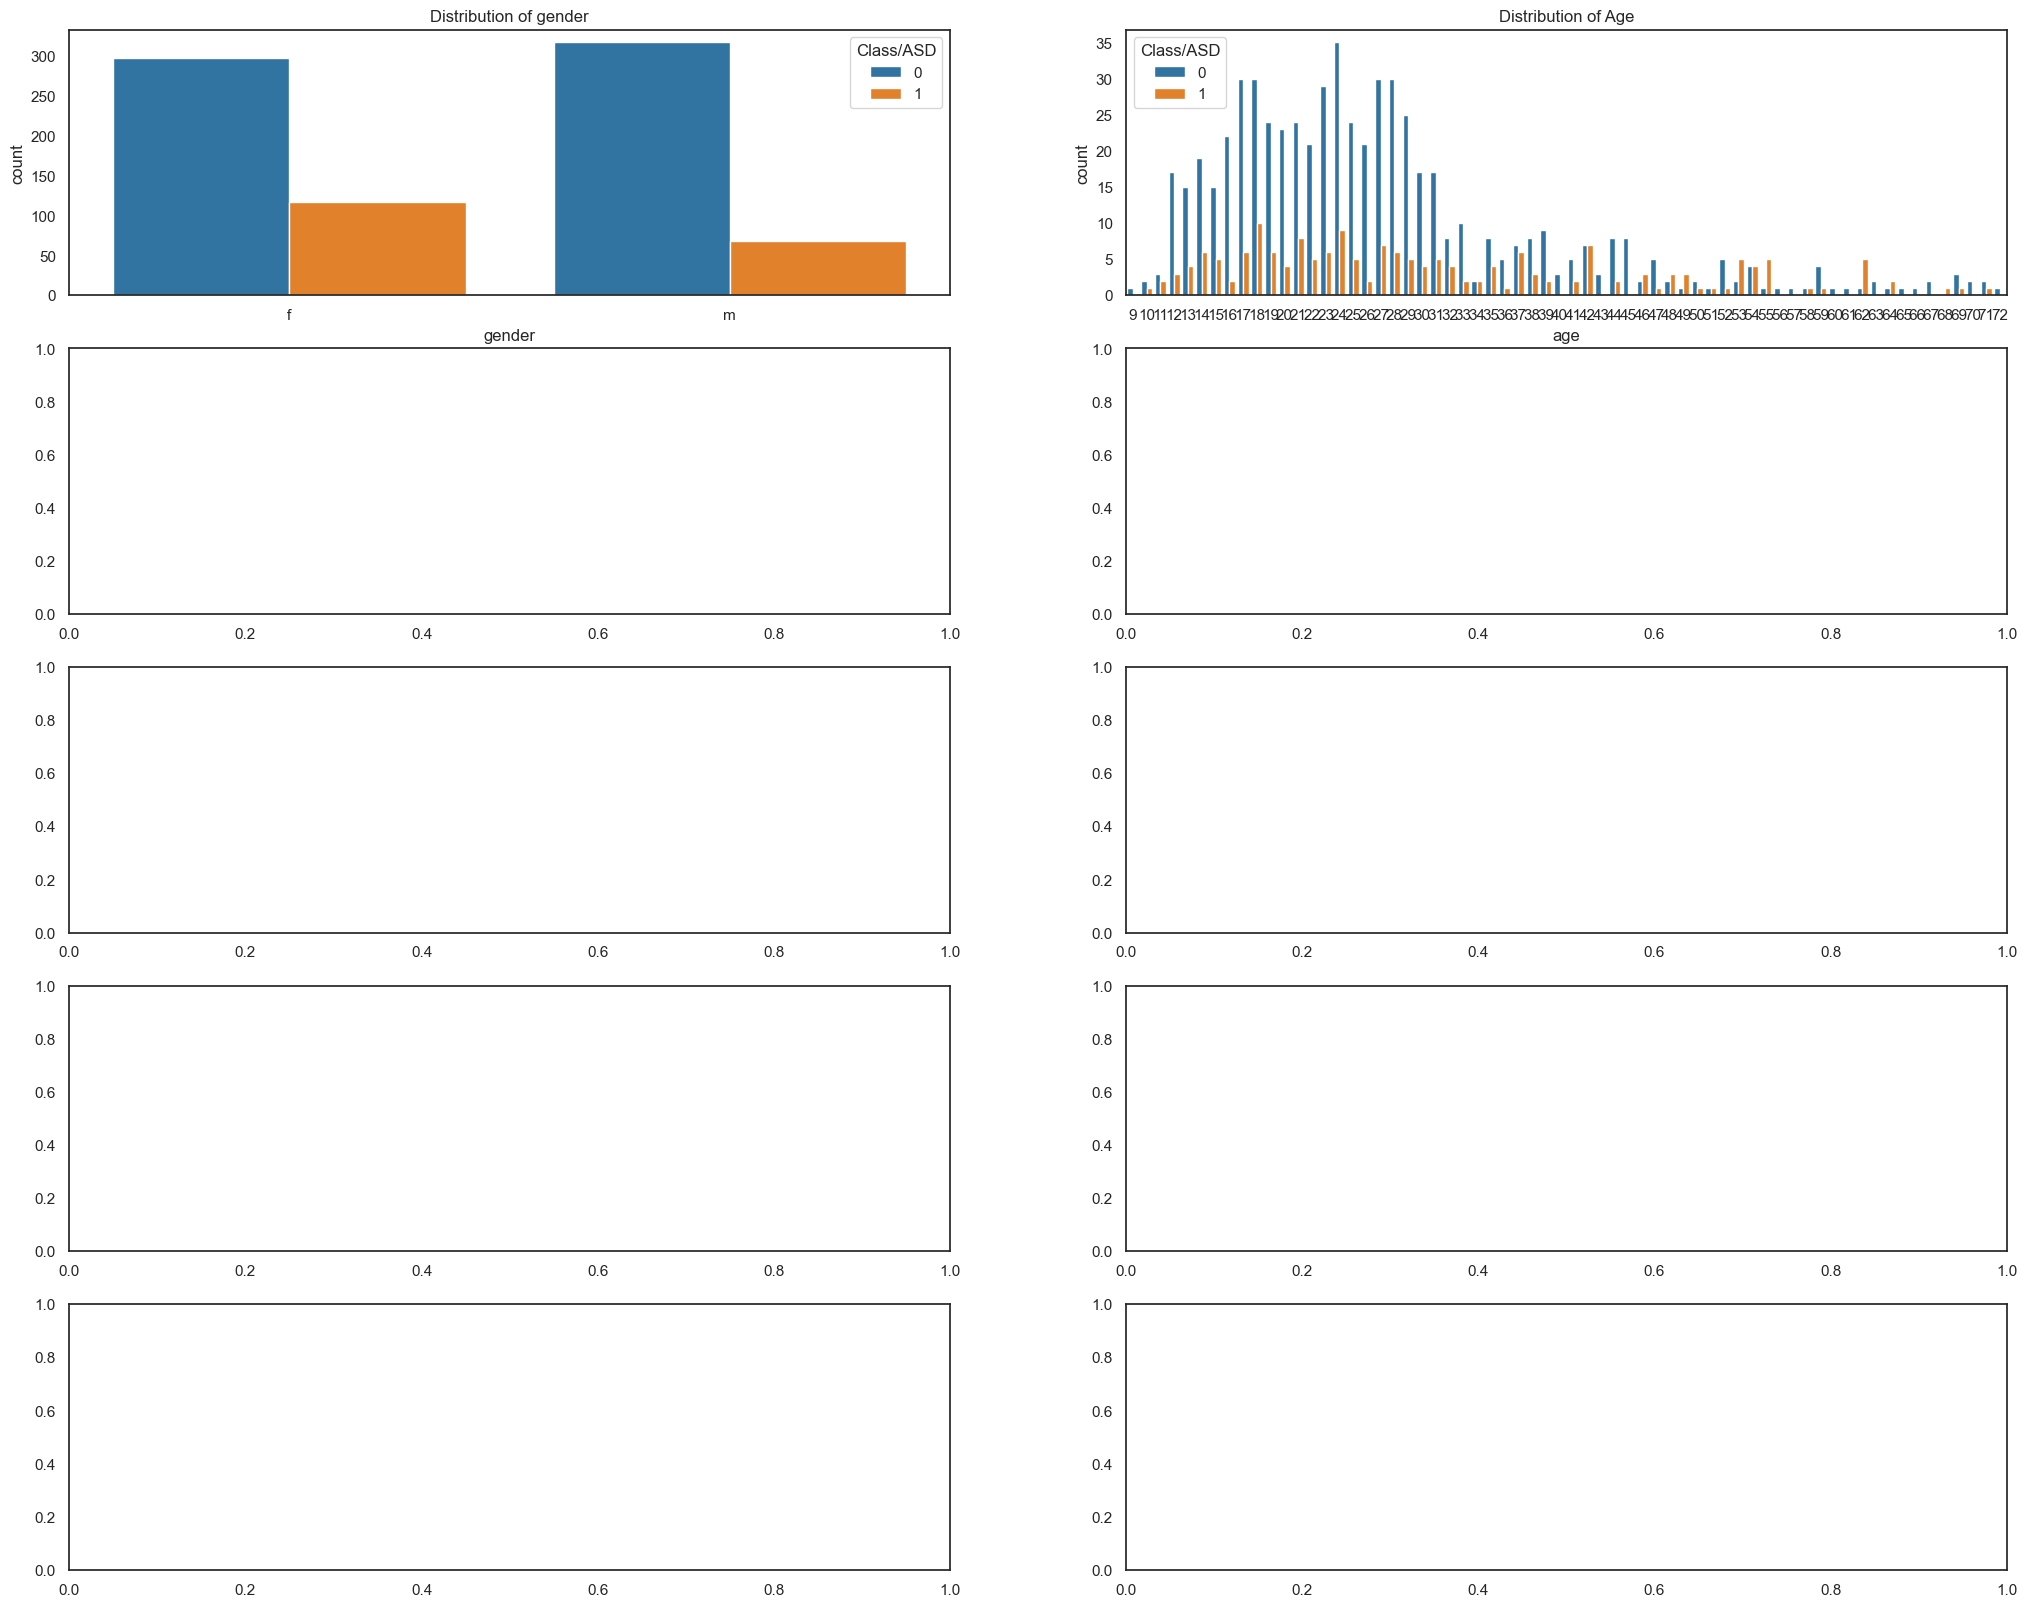

In [60]:
fig, axarr = plt.subplots(5,2, figsize=(25,20), dpi=100, facecolor='w', edgecolor='k')
sns.set(style="white")
sns.countplot(x='gender', hue = 'Class/ASD',data = train, ax=axarr[0][0], palette="tab10")
axarr[0][0].set_title('Distribution of gender')
sns.countplot(x='age', hue = 'Class/ASD',data = train, ax=axarr[0][1], palette="tab10")
axarr[0][1].set_title('Distribution of Age')

<AxesSubplot:xlabel='age', ylabel='Count'>

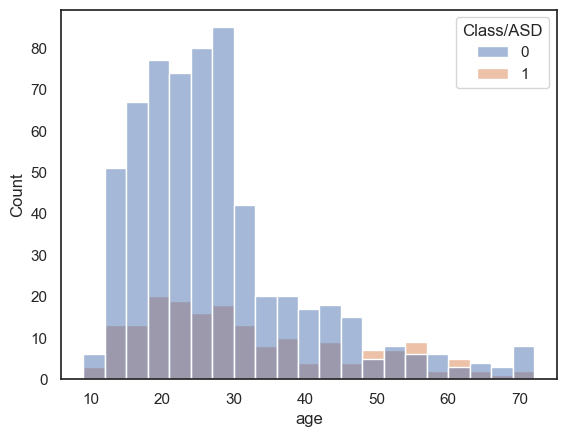

In [66]:
sns.histplot(x = 'age', hue = 'Class/ASD',data =train )

<AxesSubplot:xlabel='gender', ylabel='count'>

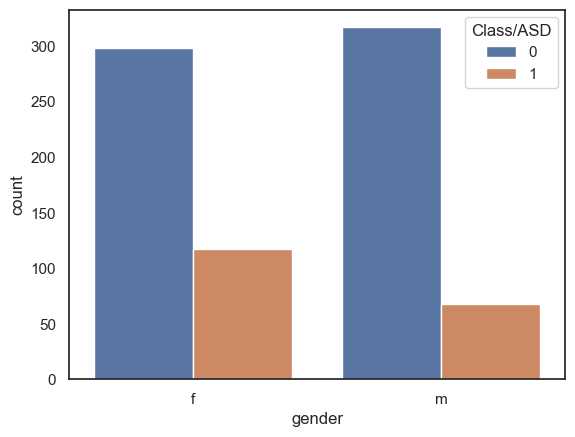

In [67]:
sns.countplot(x='gender', hue = 'Class/ASD',data = train)